In [1]:
#Importing Packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np


(540, 960, 3)


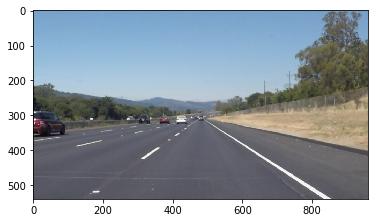

In [3]:
#Import the Image
image = mpimg.imread('test_images/solidWhiteRight.jpg')
plt.imshow(image)
print(image.shape)

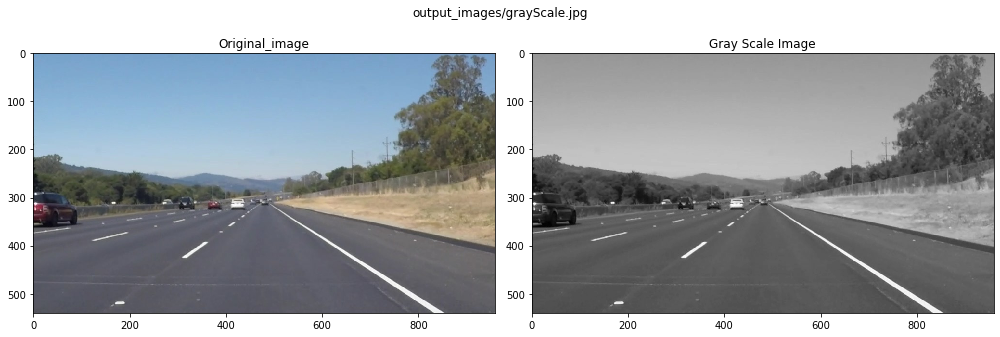

In [4]:
#Gray Scaling
import math
def grayScale(img):
    return cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
image1 = mpimg.imread('test_images/solidWhiteRight.jpg')
img_gray = grayScale(image1)
f,ax = plt.subplots(1,2,figsize=(14,5))
ax[0].imshow(image1)
ax[0].set_title("Original_image")
ax[1].imshow(img_gray, cmap='gray')
ax[1].set_title("Gray Scale Image")
img_path = 'output_images/grayScale.jpg'
f.tight_layout()
f.suptitle(img_path)
f.subplots_adjust(top=0.95)
f.savefig(img_path)

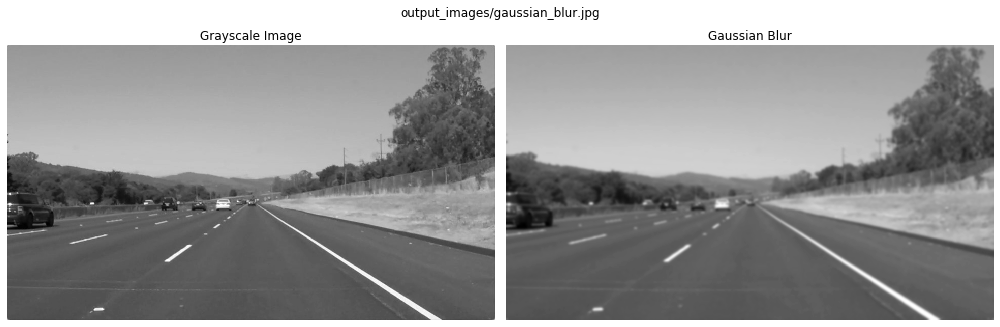

In [5]:
def gaussianBlur(img, kernal_size):
    return cv2.GaussianBlur(img, (kernal_size,kernal_size),0)

image3 = mpimg.imread('test_images/solidWhiteRight.jpg')
img_gray = grayScale(image3)
img_blur = gaussianBlur(img_gray, 11)

# plot pre and post gaussian blur
f, ax = plt.subplots(1, 2, figsize=(14,5));
ax[0].imshow(img_gray, cmap='gray'); ax[0].set_title('Grayscale Image'); 
ax[1].imshow(img_blur, cmap='gray'); ax[1].set_title('Gaussian Blur')
ax[0].axis('off'); ax[1].axis('off');

# Save figure
imgpth = 'output_images/gaussian_blur.jpg'
f.tight_layout()
f.suptitle(imgpth)
f.subplots_adjust(top=0.95)
f.savefig(imgpth)

In [6]:
def canny(img, lower_threshold, upper_threshold):
    return cv2.Canny(img, lower_threshold, upper_threshold)

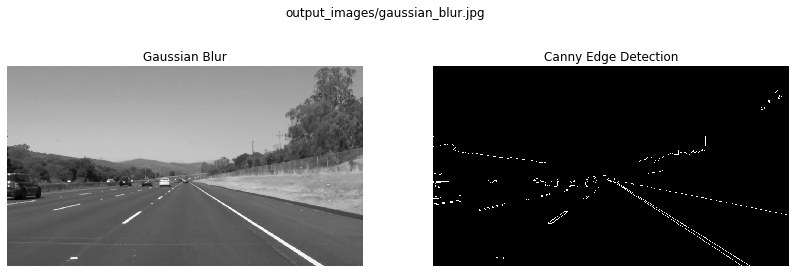

In [7]:

img3 = mpimg.imread('test_images/solidWhiteRight.jpg')
img_gray = grayScale(img3)
img_blur = gaussianBlur(img_gray, 3)
img_canny = canny(img_blur, 100, 255)

# Plot grayscale image and canny output
f, ax = plt.subplots(1, 2, figsize=(14,5));
ax[0].imshow(img_gray, cmap='gray') 
ax[0].set_title('Gaussian Blur'); 
ax[1].imshow(img_canny,cmap='gray')
ax[1].set_title('Canny Edge Detection')
ax[0].axis('off')
ax[1].axis('off')

# Save figure
()
f.suptitle(imgpth)
f.subplots_adjust(top=0.95)
f.savefig(imgpth)

In [8]:
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    if len(img.shape)>2:
        channel_count = img.shape[2]
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_image = cv2.bitwise_and(img,mask)
    return masked_image



(540, 960, 3)


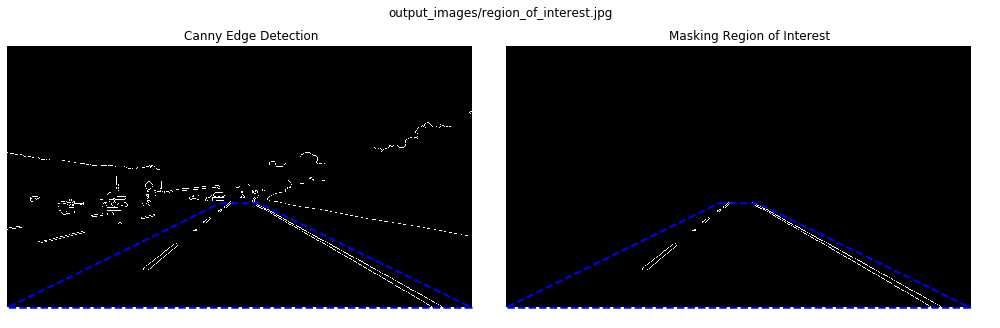

In [10]:
apex = [image.shape[1]/2, image.shape[0]/2]
trapezoid_ul = [image3.shape[1]/2-40,(image3.shape[0]/2)*1.2]
trapezoid_ur = [image3.shape[1]/2+40,(image3.shape[0]/2)*1.2]
trapezoid_lr = [image3.shape[1],image3.shape[0]]
trapezoid_ll = [0,image3.shape[0]]

img1 = mpimg.imread('test_images/solidWhiteCurve.jpg')
print(img1.shape)
img_gray = grayScale(img1)
img_blur = gaussianBlur(img_gray, 3)
img_canny = canny(img_blur, 100, 255)
img_masked = region_of_interest(img_canny, 
                                [np.array([trapezoid_ll,trapezoid_ul,trapezoid_ur,trapezoid_lr],np.int32)])

f, ax = plt.subplots(1, 2, figsize=(14,5));
ax[0].imshow(img_canny, cmap='gray'); ax[0].set_title('Canny Edge Detection'); 
ax[1].imshow(img_masked, cmap='gray'); ax[1].set_title('Masking Region of Interest')
ax[0].axis('off'); ax[1].axis('off');

# Mark the region of interest
x = [trapezoid_ul[0], trapezoid_ur[0], trapezoid_lr[0], trapezoid_ll[0], trapezoid_ul[0]]
y = [trapezoid_ul[1], trapezoid_ur[1], trapezoid_lr[1], trapezoid_ll[1], trapezoid_ul[1]]
ax[0].plot(x, y, 'b--', lw=2)
ax[1].plot(x, y, 'b--', lw=2)

# Save figure
imgpth = 'output_images/region_of_interest.jpg'
f.tight_layout()
f.suptitle(imgpth)
f.subplots_adjust(top=0.95)
f.savefig(imgpth)

In [12]:
def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):

    return cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), 
                            minLineLength=min_line_len, maxLineGap=max_line_gap)
def draw_lines(img, lines, color = [255,0,0],thickness =2, extrapolate = True):
    line_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    
    if extrapolate:
        lm = [] 
        lb = []
        rm = [] 
        rb = []
        for line in lines:
            for x1,y1,x2,y2 in line:
                m = (y2-y1) / (x2-x1)
                if (np.isfinite(m)) & (abs(m) < 1) & (abs(m) > 0.5):
                    b = y1 - m * x1
                    if(m < 0):
                        lm.append(m), lb.append(b)
                    else:
                        rm.append(m),rb.append(b)
                        
        if len(lm) > 0:
            _m    = sum(lm) / len(lm)
            _b    = sum(lb) / len(lb)
            l_p0  = (int((img.shape[0]- _b) / _m), img.shape[0])
            l_p1  = (int((img.shape[0] / 2*1.2 - _b) / _m), int(img.shape[0] / 2 * 1.2))
            cv2.line(line_image, l_p0,l_p1,color, thickness)
            
        if len(rm) > 0:
            _m   = sum(rm) / len(rm)
            _b   = sum(rb) / len(rb)
            r_p0 = (int((img.shape[0] - _b) / _m), img.shape[0])
            r_p1 = (int((img.shape[0] / 2*1.2 - _b) / _m), int(img.shape[0] / 2*1.2))
            cv2.line(line_image, r_p0,r_p1,color,thickness)
    
                
    else:
        for line in lines:
            for x1,y1,x2,y2 in line:
                cv2.line(line_image,(x1,y1),(x2,y2),color, thickness)
    α=0.8; β=1.; λ=0.
    
    # Overlay the drawn line image on input image
    return cv2.addWeighted(img, α, line_image, β, λ)

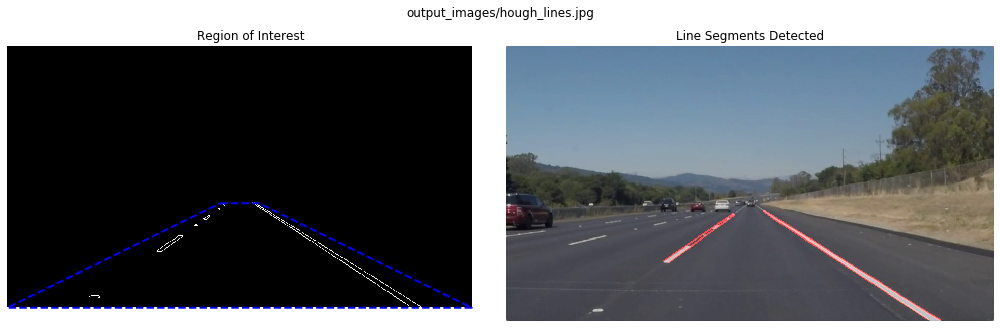

In [13]:

img1 = mpimg.imread('test_images/solidWhiteRight.jpg')
img_gray = grayScale(img1)
img_blur = gaussianBlur(img_gray, 3)
img_canny = canny(img_blur, 100, 255)
img_masked = region_of_interest(img_canny, 
                                [np.array([trapezoid_ll,trapezoid_ul,trapezoid_ur,trapezoid_lr],np.int32)])

lines = hough_lines(img = img_masked, 
                    rho = 2, 
                    theta = np.pi/120,
                    threshold = 70,
                    min_line_len = 100,
                    max_line_gap = 100)

final = draw_lines(img1, lines, extrapolate=False)

f, ax = plt.subplots(1, 2, figsize=(14,5));
ax[0].imshow(img_masked, cmap='gray'); ax[0].set_title('Region of Interest'); 
ax[1].imshow(final, cmap='gray'); ax[1].set_title('Line Segments Detected')
ax[0].axis('off'); ax[1].axis('off');

# Mark the region of interest
x = [trapezoid_ul[0], trapezoid_ur[0], trapezoid_lr[0], trapezoid_ll[0], trapezoid_ul[0]]
y = [trapezoid_ul[1], trapezoid_ur[1], trapezoid_lr[1], trapezoid_ll[1], trapezoid_ul[1]]
ax[0].plot(x, y, 'b--', lw=2)

# Save figure
imgpth = 'output_images/hough_lines.jpg'
f.tight_layout()
f.suptitle(imgpth)
f.subplots_adjust(top=0.95)
f.savefig(imgpth)

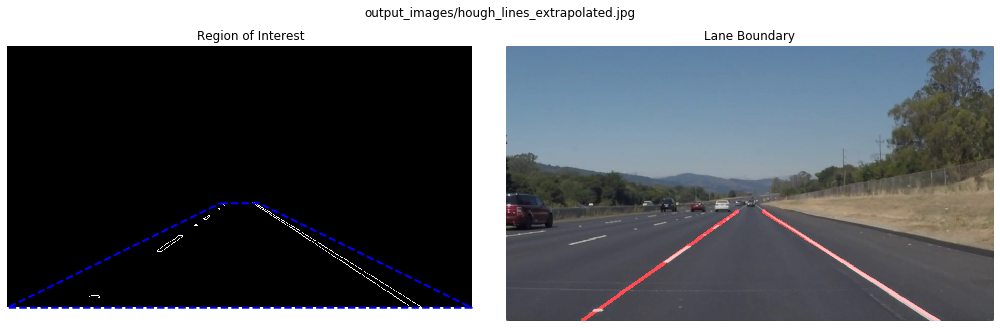

In [14]:
#Line Segement REperesentation

img = mpimg.imread('test_images/solidWhiteRight.jpg')
img_gray = grayScale(img)
img_blur = gaussianBlur(img_gray, 3)
img_canny = canny(img_blur, 100, 255)
img_masked = region_of_interest(img_canny, 
                                [np.array([trapezoid_ll,trapezoid_ul,trapezoid_ur,trapezoid_lr],np.int32)])

lines = hough_lines(img = img_masked, 
                    rho = 2, 
                    theta = np.pi/120,
                    threshold = 70,
                    min_line_len = 100,
                    max_line_gap = 100)

final = draw_lines(img, lines, extrapolate=True, thickness=5)

f, ax = plt.subplots(1, 2, figsize=(14,5));
ax[0].imshow(img_masked, cmap='gray'); ax[0].set_title('Region of Interest'); 
ax[1].imshow(final, cmap='gray'); ax[1].set_title('Lane Boundary')
ax[0].axis('off'); ax[1].axis('off');

# Mark the region of interest
x = [trapezoid_ul[0], trapezoid_ur[0], trapezoid_lr[0], trapezoid_ll[0], trapezoid_ul[0]]
y = [trapezoid_ul[1], trapezoid_ur[1], trapezoid_lr[1], trapezoid_ll[1], trapezoid_ul[1]]
ax[0].plot(x, y, 'b--', lw=2)

# Save figure
imgpth = 'output_images/hough_lines_extrapolated.jpg'
f.tight_layout()
f.suptitle(imgpth)
f.subplots_adjust(top=0.95)
f.savefig(imgpth)

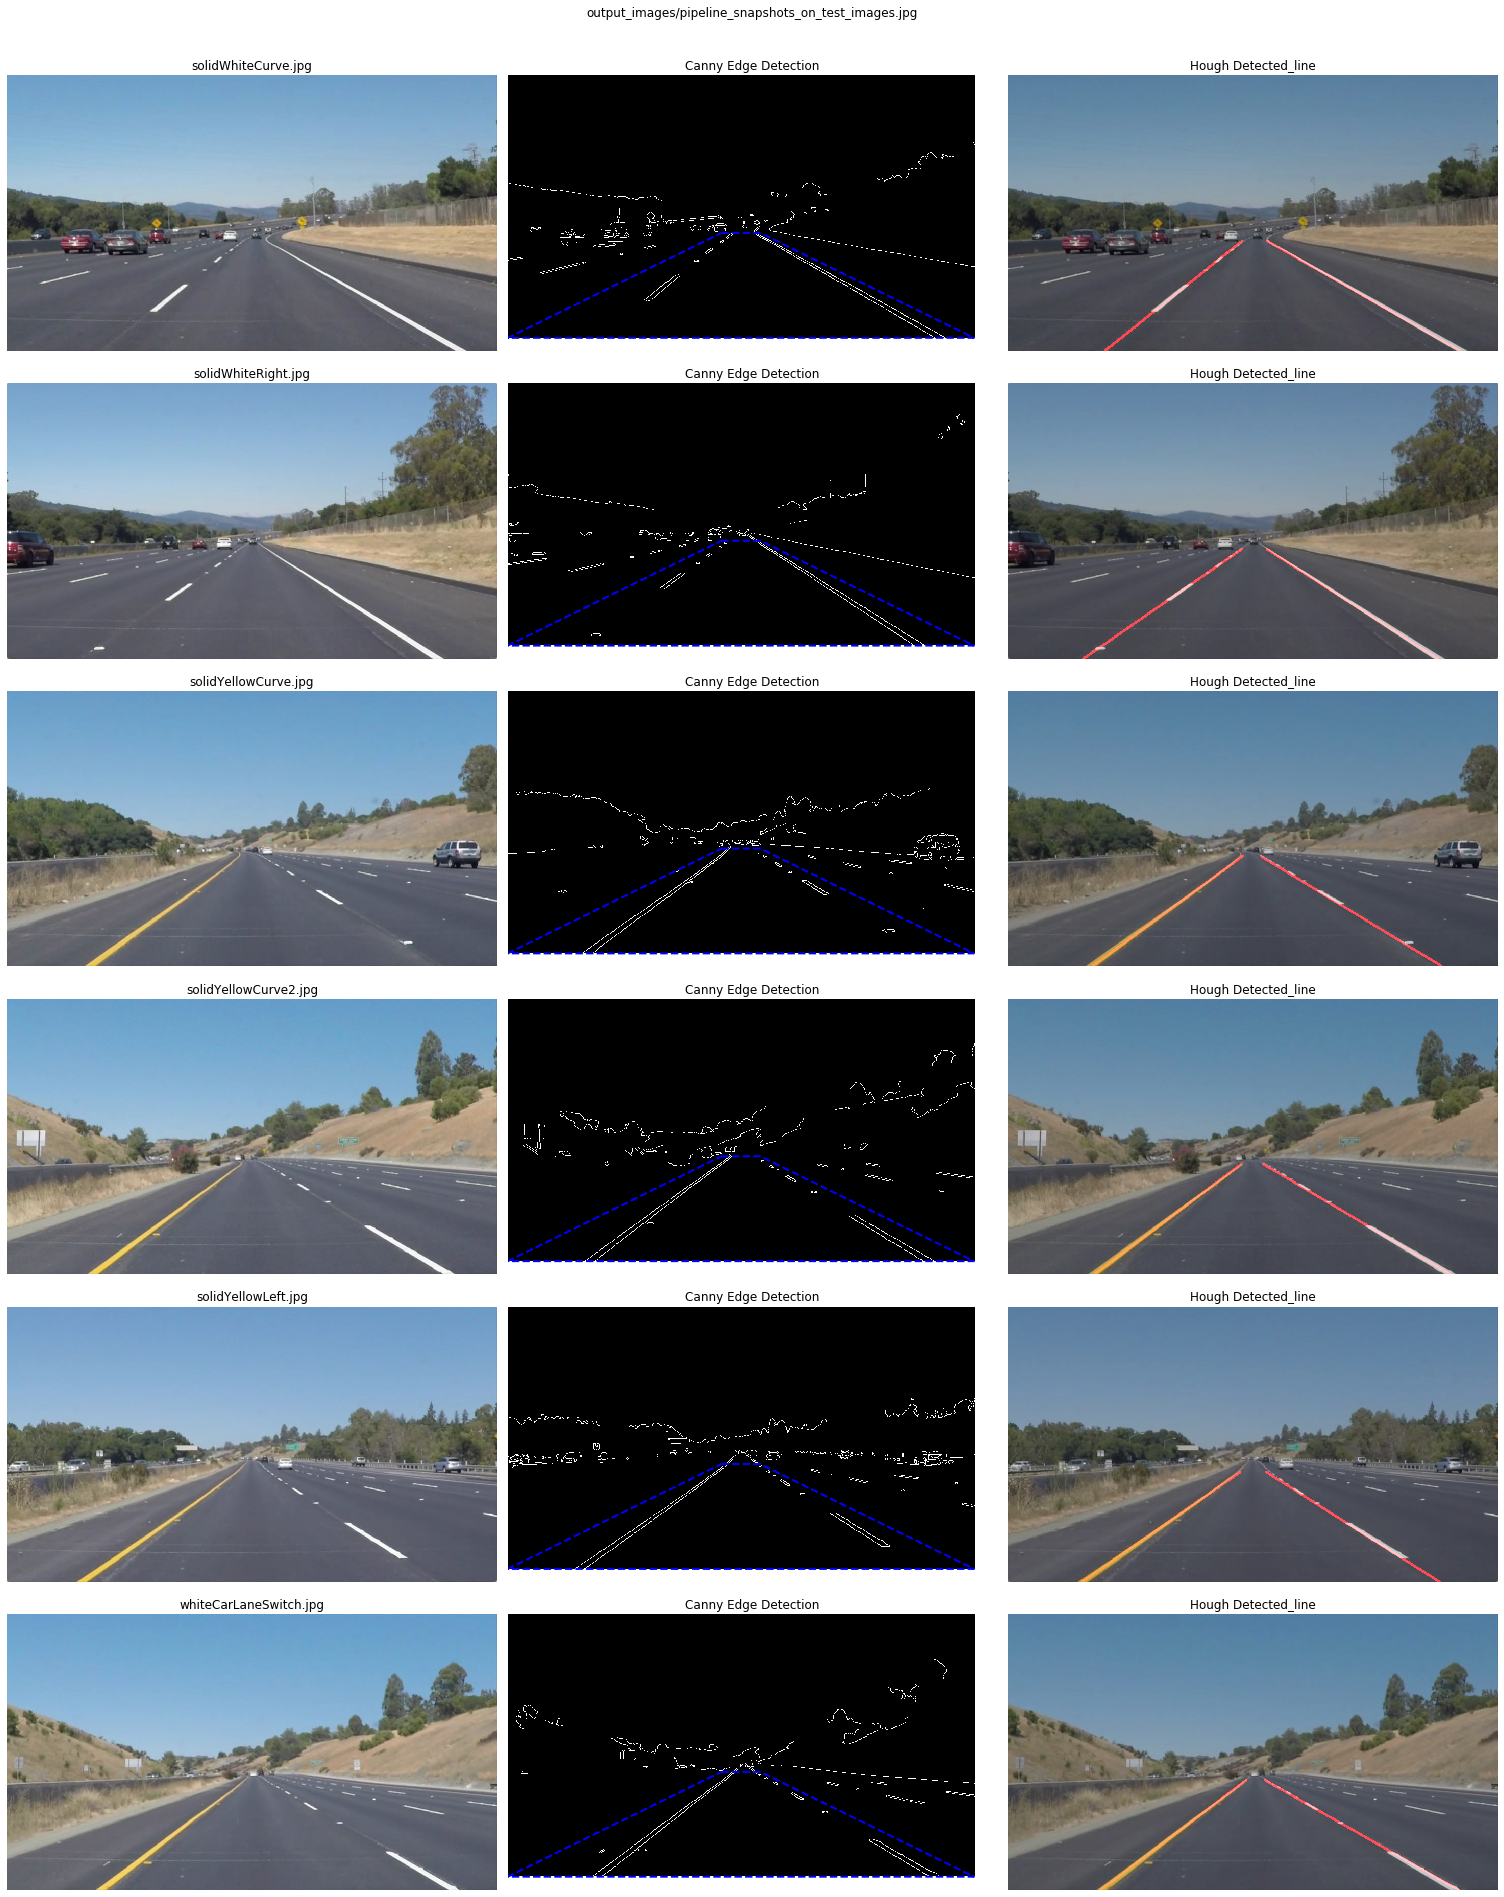

In [15]:
# Pipeline For lane
import os
import glob
images_dir = './test_images/'
images_path = sorted(glob.glob(images_dir  + '/*.jpg'))
cols = 3
rows = len(images_path)
f , ax = plt.subplots(rows, cols, figsize = (cols * 7, rows * 4.5))

apex = [img.shape[1] / 2,img.shape[0] / 2]
trapezoid_ul = [img.shape[1]/2-40 , (img.shape[0] / 2 )* 1.2]
trapezoid_ur = [img.shape[1]/2+40 , (img.shape[0] / 2 )* 1.2]
trapezoid_lr = [img.shape[1],img.shape[0]]
trapezoid_ll = [0, img.shape[0]]

if rows > 0:
    for r, pth in enumerate(images_path):
        img          = mpimg.imread(pth)
        img_gray     = grayScale(img)
        img_blur     = gaussianBlur(img_gray,3)
        img_canny    = canny(img_blur,100,255)

        masked_image = region_of_interest(img_canny, [np.array([trapezoid_ll, trapezoid_ul,trapezoid_ur,trapezoid_lr], np.int32)])
        
        lines = hough_lines(img = masked_image, rho=1, theta = np.pi/180,threshold = 50, min_line_len = 10, max_line_gap = 10)
        
        final = draw_lines(img, lines, thickness=4)
        ax[r,0].axis('off')
        ax[r,0].set_title(os.path.basename(pth))
        ax[r,0].imshow(img)
        
        ax[r,1].axis('off')
        ax[r,1].set_title("Canny Edge Detection")
        ax[r,1].imshow(img_canny, cmap='gray')
        x   = [trapezoid_ul[0], trapezoid_ur[0], trapezoid_lr[0],trapezoid_ll[0],trapezoid_ul[0]]
        y   = [trapezoid_ul[1], trapezoid_ur[1], trapezoid_lr[1],trapezoid_ll[1],trapezoid_ul[1]]
        ax[r,1].plot(x , y, 'b--', lw =2)
        
        ax[r,2].axis('off'); ax[r,2].set_title("Hough Detected_line")
        ax[r,2].imshow(final,cmap='gray')
        
        
        
imgpth = 'output_images/pipeline_snapshots_on_test_images.jpg'
f.tight_layout()
f.suptitle(imgpth)
f.subplots_adjust(top=0.95)
f.savefig(imgpth)        

In [17]:
#Using Lane Detection On Videos

# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [20]:
def process_image(image): 
    img = np.copy(image)
    img_gray = grayScale(img)
    img_blur = gaussianBlur(img_gray, 3)
    img_canny = canny(img_blur, 0, 200)
    
    apex = [image.shape[1]/2, image.shape[0]/2]
    trapezoid_ul = [img.shape[1]/2-40,(img.shape[0]/2)*1.2]
    trapezoid_ur = [img.shape[1]/2+40,(img.shape[0]/2)*1.2]
    trapezoid_lr = [img.shape[1],img.shape[0]]
    trapezoid_ll = [0,img.shape[0]]
    
    img_masked = region_of_interest(img_canny, 
                                    [np.array([trapezoid_ll,
                                               trapezoid_ul,
                                               trapezoid_ur,
                                               trapezoid_lr],np.int32)])
    lines = hough_lines(img = img_masked, 
                        rho = 2, 
                        theta = np.pi/120,
                        threshold = 70,
                        min_line_len = 100,
                        max_line_gap = 250)

    final = draw_lines(img, lines, thickness=5)
    return final

In [22]:
white_output = 'output_videos/final_solidWhiteRight.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

t:   0%|                                                                             | 0/221 [00:00<?, ?it/s, now=None]

Moviepy - Building video output_videos/final_solidWhiteRight.mp4.
Moviepy - Writing video output_videos/final_solidWhiteRight.mp4




t:  81%|██████████████████████████████████████████████████████▎            | 179/221 [00:10<00:02, 16.27it/s, now=None]


t:   1%|▌                                                                    | 2/221 [22:19<01:24,  2.59it/s, now=None]

Moviepy - Done !
Moviepy - video ready output_videos/final_solidWhiteRight.mp4
Wall time: 15.1 s


In [24]:

HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

In [25]:
yellow_output = 'output_videos/final_solidYellowLeft.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4').subclip(0,5)
clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)


t:   0%|                                                                             | 0/681 [00:00<?, ?it/s, now=None]

Moviepy - Building video output_videos/final_solidYellowLeft.mp4.
Moviepy - Writing video output_videos/final_solidYellowLeft.mp4




t:  33%|██████████████████████▏                                            | 226/681 [00:11<00:33, 13.55it/s, now=None]


t:  58%|██████████████████████████████████████▉                            | 396/681 [00:21<00:14, 19.49it/s, now=None]


t:  87%|██████████████████████████████████████████████████████████▏        | 592/681 [00:31<00:04, 20.65it/s, now=None]


t:   1%|▌                                                                    | 2/221 [28:19<01:24,  2.59it/s, now=None]

Moviepy - Done !
Moviepy - video ready output_videos/final_solidYellowLeft.mp4
Wall time: 39.1 s


In [26]:

HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

In [27]:
#Challange
challenge_output = 'output_videos/final_challenge.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip3 = VideoFileClip('test_videos/challenge.mp4').subclip(0,5)
clip3 = VideoFileClip('test_videos/challenge.mp4')
challenge_clip = clip3.fl_image(process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)

t:   0%|                                                                             | 0/251 [00:00<?, ?it/s, now=None]

Moviepy - Building video output_videos/final_challenge.mp4.
Moviepy - Writing video output_videos/final_challenge.mp4




t:  49%|█████████████████████████████████                                  | 124/251 [00:14<00:16,  7.88it/s, now=None]


t:  86%|█████████████████████████████████████████████████████████▉         | 217/251 [00:28<00:05,  6.67it/s, now=None]


t:   1%|▌                                                                    | 2/221 [30:21<01:24,  2.59it/s, now=None]

Moviepy - Done !
Moviepy - video ready output_videos/final_challenge.mp4
Wall time: 35.9 s


In [28]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))